In [1]:
%cd ../..

/home/work/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from examples.fep_control import fep_control
from combinators.model import active
from combinators.model import compose, foldable
from combinators.inference import importance, mcmc
from combinators import utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
target = fep_control.BipedalWalkerAgent(state_dim=12, batch_shape=(10,), trainable=False)
proposal = fep_control.RecognitionAgent(state_dim=12, action_dim=4, observation_dim=24, batch_shape=(10,),
                                        discrete_actions=False, name='BipedalWalkerAgent', trainable=True,
                                        goal=target.goal)
agent = importance.propose(target, proposal)

In [5]:
episode = active.ActiveEpisode(agent, 'BipedalWalker-v2')

In [6]:
theta, graph, log_weight = episode(render=True)

In [7]:
xi, trained_params, elbos = active.active_variational(episode, 100, lr=1e-3, log_estimator=True, patience=100)

07/11/2019 14:01:08 Episode length: 38
07/11/2019 14:01:08 ELBO=-1.52057690e+03 per step at epoch 1
07/11/2019 14:01:13 Episode length: 656
07/11/2019 14:01:15 ELBO=-1.48852454e+03 per step at epoch 2
07/11/2019 14:01:16 Episode length: 73
07/11/2019 14:01:16 ELBO=-1.46153394e+03 per step at epoch 3
07/11/2019 14:01:27 Episode length: 1601
07/11/2019 14:01:32 ELBO=-1.47003870e+03 per step at epoch 4
07/11/2019 14:01:33 Episode length: 72
07/11/2019 14:01:34 ELBO=-1.44618237e+03 per step at epoch 5
07/11/2019 14:01:34 Episode length: 74
07/11/2019 14:01:34 ELBO=-1.41989612e+03 per step at epoch 6
07/11/2019 14:01:46 Episode length: 1601
07/11/2019 14:01:53 ELBO=-1.43178564e+03 per step at epoch 7
07/11/2019 14:01:54 Episode length: 72
07/11/2019 14:01:54 ELBO=-1.43216272e+03 per step at epoch 8
07/11/2019 14:01:55 Episode length: 111
07/11/2019 14:01:56 ELBO=-1.38578101e+03 per step at epoch 9
07/11/2019 14:02:06 Episode length: 1252
07/11/2019 14:02:11 ELBO=-1.39205798e+03 per step at 

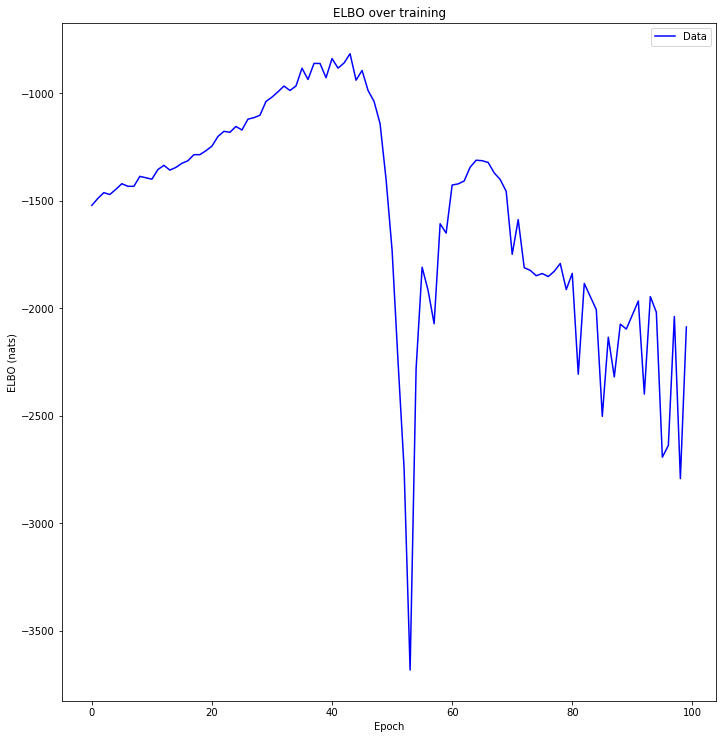

In [8]:
utils.plot_evidence_bounds(elbos[:, 0].cpu().detach().numpy())

In [13]:
theta, graph, log_weight = episode(render=True)

In [14]:
theta

{'dynamics': tensor([[ 3.2660, -0.1906, -3.5716, -5.1467, -3.5507,  3.1837, -3.5034, -3.4695,
           2.9271, -4.5507, -2.2921,  2.1139],
         [ 3.0762, -0.1754, -3.3456, -4.7956, -3.3301,  2.9825, -3.2817, -3.2418,
           2.7439, -4.2470, -2.1573,  1.9697],
         [ 3.1467, -0.1848, -3.4374, -4.9532, -3.4218,  3.0646, -3.3632, -3.3311,
           2.8274, -4.3719, -2.1934,  2.0150],
         [ 3.2539, -0.1863, -3.5432, -5.0986, -3.5236,  3.1514, -3.4757, -3.4416,
           2.9051, -4.5065, -2.2778,  2.0963],
         [ 3.1175, -0.1730, -3.3893, -4.8588, -3.3681,  3.0199, -3.3154, -3.2852,
           2.7788, -4.3026, -2.1784,  1.9979],
         [ 3.1637, -0.1877, -3.4506, -4.9638, -3.4263,  3.0840, -3.3656, -3.3493,
           2.8277, -4.3903, -2.2068,  2.0167],
         [ 3.1266, -0.1824, -3.4292, -4.9107, -3.4000,  3.0540, -3.3496, -3.3083,
           2.8199, -4.3449, -2.1949,  2.0022],
         [ 3.1623, -0.1908, -3.4545, -4.9609, -3.4260,  3.0701, -3.3751, -3.3409,
   

In [15]:
log_weight

tensor([-3287627.2500, -3282931.7500, -3287794.5000, -3292553.0000,
        -3294712.7500, -3290381.0000, -3290476.5000, -3278280.7500,
        -3312996.7500, -3286522.7500], grad_fn=<AddBackward0>)

In [16]:
torch.save(agent, 'examples/fep_control/fep_bipedal_walker_agent.dat')